# 서울시 코로나 19 확진자 지도 시각화

## OVERHEAD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../drive-download-20201111T141323Z-001/서울시 코로나19 확진자 현황.csv',encoding='CP949')
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,6407,11.09.,NaN,NaN,NaN,강동구,NaN,강남구 럭키사우나 관련,NaN,NaN,NaN,2020-11-10 10:13:21,2020-11-10 10:13:21,Y
1,6406,11.09.,NaN,NaN,NaN,광진구,NaN,강남구 헬스장 관련,NaN,NaN,NaN,2020-11-10 10:13:21,2020-11-10 19:22:07,Y
2,6405,11.09.,NaN,NaN,NaN,중랑구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-11-10 10:13:21,2020-11-10 10:13:21,Y
3,6404,11.09.,NaN,NaN,NaN,도봉구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-11-10 10:13:21,2020-11-10 10:13:21,Y
4,6403,11.09.,NaN,NaN,NaN,강동구,NaN,영등포구 증권회사 관련,NaN,NaN,NaN,2020-11-10 10:13:21,2020-11-10 10:13:21,Y


In [3]:
seoul_latlon = pd.read_csv('../drive-download-20201111T141323Z-001/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv',encoding='CP949')
seoul_latlon

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


서울시 코로나 현황 데이터와 지리 정보를 위한 서울시 지역구 데이터를 읽어온다.

In [36]:
df['지역'].unique()

array(['강동구', '광진구', '중랑구', '도봉구', '서초구', '동대문구', '관악구', '기타', '송파구',
       '강서구', '동작구', '은평구', '강남구', '용산구', '서대문구', '성동구', '타시도', '양천구',
       '영등포구', '마포구', '금천구', '성북구', '강북구', '중구', '노원구', '종로구', '구로구',
       '종랑구', '한국'], dtype=object)

한국, 타시도, 기타 등의 서울시 구 이름이 아닌 다른 이름이 존재하는 것 파악

In [4]:
seoul_latlon_2=seoul_latlon[['시군구코드','시군구명_한글','위도','경도']]
seoul_latlon_2.rename({'시군구명_한글':'지역','위도':'latitude','경도':'longitude'},axis=1,inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


지역구의 경도와 위도를 얻기 위해 데이터 프레임 생성 (사용하지는 않았음)

In [5]:
df = pd.merge(df,seoul_latlon_2,on='지역',how='left')

In [6]:
df=df.dropna(subset=['latitude'])

In [45]:
df[df['latitude'].isnull()]

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,시군구코드,latitude,longitude


지역구가 나타나지 않은 확진자 데이터가 존재하여 이를 삭제

#### 지역구 별 확진자 수 지도 시각화

In [8]:
import folium
import json 
geo_data = 'C:/Users/USER/Downloads/drive-download-20201111T141323Z-001/seoul_municipalities_geo.json'
with open(geo_data,encoding='UTF8') as f:
    data = json.loads(f.read())




In [9]:
new_df = df.groupby('지역').count()['연번'].reset_index()[:-2]

In [72]:
center = [37.541, 126.986] 
m = folium.Map(
    location=center,
    zoom_start=10,) 
 
folium.Choropleth( 
    geo_data=data,
    data=new_df,
    columns=('지역', '연번'),
    key_on='feature.properties.name',
    fill_color='BuPu',
    legend_name = 'num of patient',
    fill_opacity=0.5,
    line_opacity=0.7).add_to(m) 


m

#### 지역구 별 확진자 수 bar 그래프

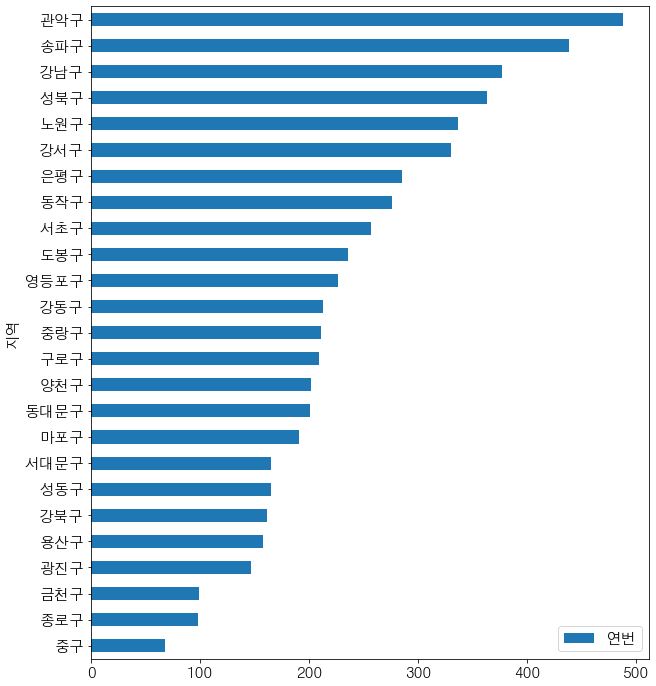

In [82]:
from matplotlib import font_manager,rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)

c = df.groupby(['지역']).count()['연번'].reset_index()
c.sort_values('연번').plot('지역','연번',kind='barh',figsize=(10,12))
plt.rc('font',size=15)
plt.show()

#### 접촉력 별 확진자 수 bar 그래프

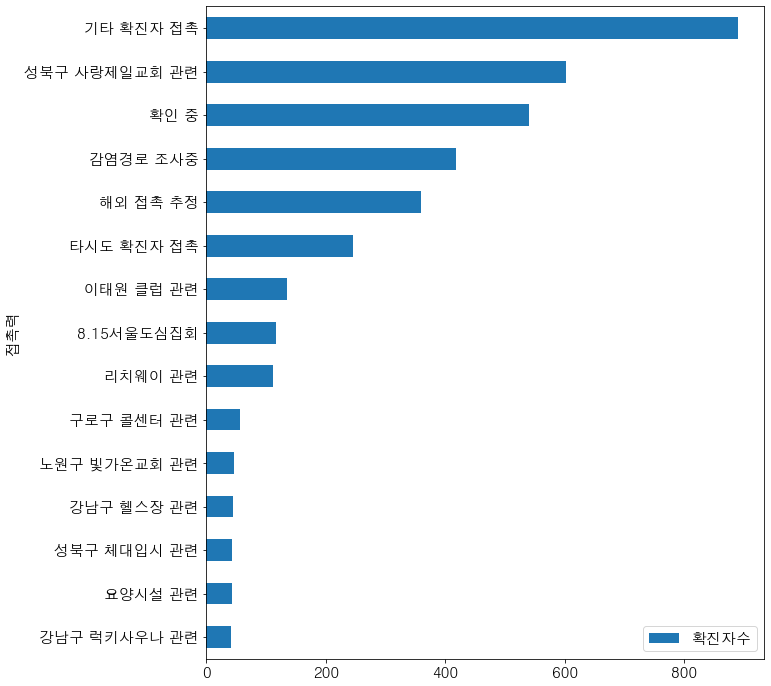

In [84]:
from matplotlib import font_manager,rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)

a = df.groupby(['접촉력']).count()['연번'].reset_index().rename({'연번':'확진자수'},axis=1)
a.sort_values('확진자수')[-15:].plot('접촉력','확진자수',kind='barh',figsize=(10,12))
plt.rc('font',size=15)
plt.show()


#### 여행력 별 확진자 수 bar 그래프

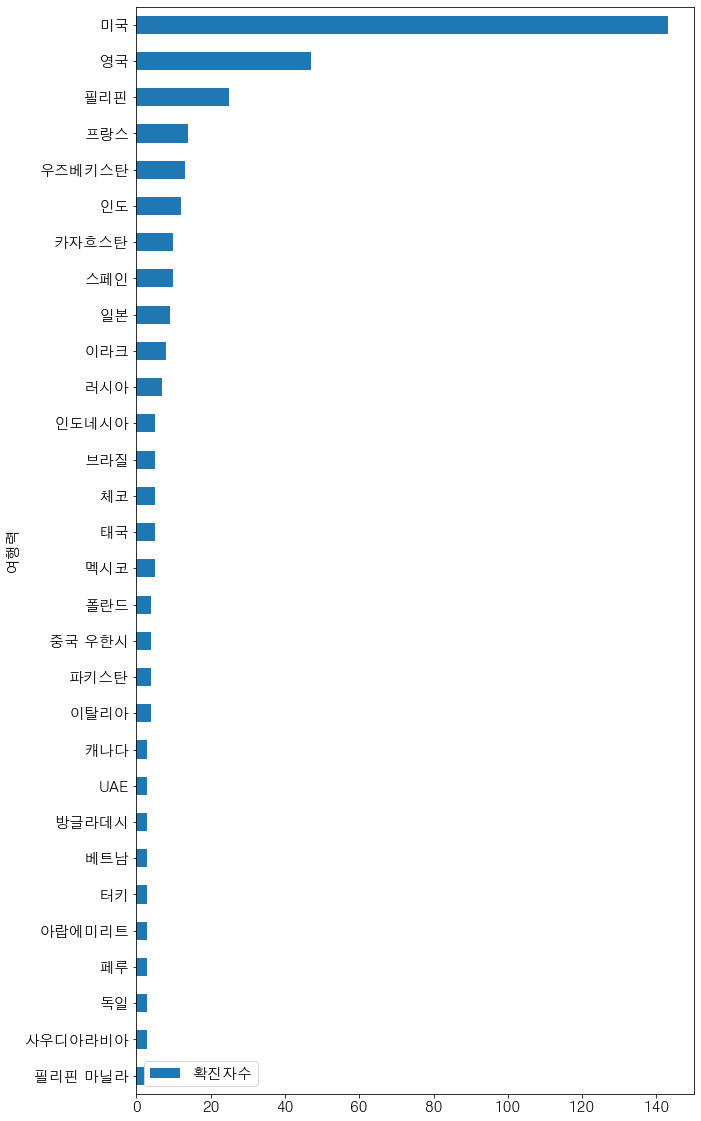

In [107]:
b = df.groupby('여행력').count()['연번'].reset_index().rename({'연번':'확진자수'},axis=1)
b.sort_values('확진자수')[-30:].plot('여행력','확진자수',kind='barh',figsize=(10,20))
plt.rc('font',size=15)
plt.show()


### 교육통계서비스 유학생 데이터

In [89]:
foreign = pd.read_csv('../drive-download-20201111T141323Z-001/유학생.csv')
foreign = foreign.dropna().transpose()

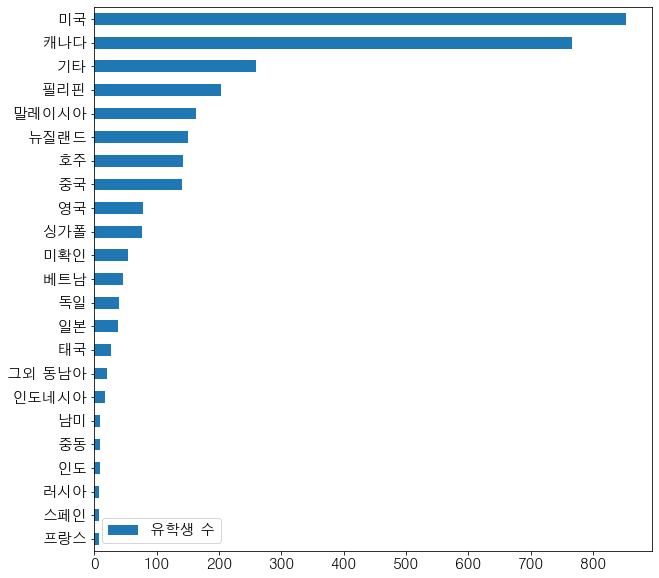

In [99]:
foreign[1:].sort_values(0,ascending=True).rename({0:'유학생 수'},axis=1).plot(kind='barh',figsize=(10,10))
plt.show()